# Doc embedding evaluation (41 repositories / test set)

## 1. Loading repository information

In [18]:
!pip install gdown
!gdown 1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_

Downloading...
From: https://drive.google.com/uc?id=1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_
To: /content/repo_info_test.pkl
100% 19.8M/19.8M [00:00<00:00, 61.0MB/s]


In [20]:
import pickle

with open("repo_info_test.pkl", "rb") as f:
    repo_info = pickle.load(f)
    f.close()

## 2. Download pre-trained model

In [21]:
!pip3 install torch
!pip3 install transformers
!wget https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
# !curl -O https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py

--2023-07-09 18:17:48--  https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10352 (10K) [text/plain]
Saving to: ‘unixcoder.py’

unixcoder.py        100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-07-09 18:17:48 (107 MB/s) - ‘unixcoder.py’ saved [10352/10352]



In [22]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [23]:
unixcoder_model_names = [
    "Lazyhope/unixcoder-nine-advtest"
]

In [24]:
from unixcoder import UniXcoder

unixcoder_models = {}

# Initialise unixcoder model
for u_name in unixcoder_model_names:
    unixcoder_models[u_name] = UniXcoder(u_name)
    unixcoder_models[u_name].to(device)

## 3. Generating doc embeddings

In [25]:
# Getting doc embeddings
def get_unixcoder_embeddings(data, model):
    tokens_ids = model.tokenize([data], max_length=512, mode="<encoder-only>")
    source_ids = torch.tensor(tokens_ids).to(device)
    _, embeddings = model(source_ids)
    return embeddings

# Getting other embbeddings
def get_other_embeddings(data_list):
    embeddings = {}

    # Unixcoder model
    for u_name, u_model in tqdm(unixcoder_models.items()):
        print(f" - Using {u_name} model - ")
        embeddings_list = torch.concat([get_unixcoder_embeddings(data, u_model) for data in data_list])
        embeddings[u_name] = embeddings_list

    return embeddings


# Getting embeddings
def get_embeddings(input_data=None, input_mode=None):
    if input_data is None or not input_data:
        return torch.zeros((768,), device=device)

    with torch.no_grad():
        if input_mode == "docs":
            return get_other_embeddings(input_data)


In [26]:
from tqdm import tqdm

for repo_name, repo_dict in tqdm(repo_info.items()):
    print(f" - Generating doc embeddings for {repo_name} - ")
    repo_dict["docs_embeddings"] = get_embeddings(input_data=repo_dict["docs"], input_mode="docs")

  0%|          | 0/41 [00:00<?, ?it/s]

 - Generating doc embeddings for ellisonleao/pyshorteners - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  2%|▏         | 1/41 [00:00<00:15,  2.63it/s]

 - Generating doc embeddings for sloria/doitlive - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  5%|▍         | 2/41 [00:00<00:14,  2.66it/s]

 - Generating doc embeddings for sebastien/cuisine - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



  7%|▋         | 3/41 [00:09<02:37,  4.14s/it]

 - Generating doc embeddings for lepture/authlib - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 10%|▉         | 4/41 [00:15<03:08,  5.09s/it]

 - Generating doc embeddings for inducer/pudb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 12%|█▏        | 5/41 [00:16<02:03,  3.44s/it]

 - Generating doc embeddings for uber/pyflame - 



100%|██████████| 1/1 [00:00<00:00, 37.05it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for aws/aws-cli - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 17%|█▋        | 7/41 [00:22<01:51,  3.27s/it]

 - Generating doc embeddings for DamnWidget/anaconda - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 20%|█▉        | 8/41 [00:36<03:20,  6.07s/it]

 - Generating doc embeddings for pykong/copier - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 22%|██▏       | 9/41 [00:37<02:32,  4.76s/it]

 - Generating doc embeddings for FactoryBoy/factory_boy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 24%|██▍       | 10/41 [00:39<02:01,  3.91s/it]

 - Generating doc embeddings for pynamodb/PynamoDB - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 27%|██▋       | 11/41 [00:41<01:43,  3.45s/it]

 - Generating doc embeddings for jschneier/django-storages - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 29%|██▉       | 12/41 [00:42<01:17,  2.66s/it]

 - Generating doc embeddings for robotframework/robotframework - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 32%|███▏      | 13/41 [00:52<02:17,  4.90s/it]

 - Generating doc embeddings for mininet/mininet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 34%|███▍      | 14/41 [00:57<02:11,  4.88s/it]

 - Generating doc embeddings for ztane/python-Levenshtein - 
 - Generating doc embeddings for audreyr/cookiecutter - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 39%|███▉      | 16/41 [01:03<01:38,  3.94s/it]

 - Generating doc embeddings for google/python-fire - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 41%|████▏     | 17/41 [01:05<01:23,  3.49s/it]

 - Generating doc embeddings for pycco-docs/pycco - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 44%|████▍     | 18/41 [01:05<01:01,  2.68s/it]

 - Generating doc embeddings for rossgoodwin/hmap - 
 - Generating doc embeddings for idan/oauthlib - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 49%|████▉     | 20/41 [01:10<00:54,  2.61s/it]

 - Generating doc embeddings for paramiko/paramiko - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 51%|█████     | 21/41 [01:15<01:01,  3.05s/it]

 - Generating doc embeddings for kevin1024/vcrpy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 54%|█████▎    | 22/41 [01:17<00:51,  2.73s/it]

 - Generating doc embeddings for platformio/platformio-core - 



 56%|█████▌    | 23/41 [01:17<00:36,  2.04s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for graphql-python/graphene - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 59%|█████▊    | 24/41 [01:18<00:31,  1.84s/it]

 - Generating doc embeddings for klen/mixer - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 61%|██████    | 25/41 [01:20<00:29,  1.83s/it]

 - Generating doc embeddings for seatgeek/sixpack - 



100%|██████████| 1/1 [00:00<00:00, 12.88it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for bpython/bpython - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 66%|██████▌   | 27/41 [01:22<00:20,  1.47s/it]

 - Generating doc embeddings for dfunckt/django-rules - 



 68%|██████▊   | 28/41 [01:22<00:14,  1.15s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for coleifer/peewee - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 71%|███████   | 29/41 [01:23<00:11,  1.02it/s]

 - Generating doc embeddings for pythonnet/pythonnet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 73%|███████▎  | 30/41 [01:28<00:23,  2.11s/it]

 - Generating doc embeddings for python/typeshed - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 76%|███████▌  | 31/41 [01:34<00:32,  3.25s/it]

 - Generating doc embeddings for KoffeinFlummi/Chronyk - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 78%|███████▊  | 32/41 [01:34<00:21,  2.43s/it]

 - Generating doc embeddings for isnowfy/snownlp - 



100%|██████████| 1/1 [00:00<00:00, 35.75it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating doc embeddings for alecthomas/voluptuous - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 83%|████████▎ | 34/41 [01:35<00:10,  1.54s/it]

 - Generating doc embeddings for spulec/freezegun - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 85%|████████▌ | 35/41 [01:35<00:07,  1.24s/it]

 - Generating doc embeddings for maxmind/geoip-api-python - 
 - Generating doc embeddings for pallets/werkzeug - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 90%|█████████ | 37/41 [01:42<00:08,  2.04s/it]

 - Generating doc embeddings for nvbn/thefuck - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 93%|█████████▎| 38/41 [01:43<00:05,  1.81s/it]

 - Generating doc embeddings for benfred/implicit - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 95%|█████████▌| 39/41 [01:44<00:03,  1.64s/it]

 - Generating doc embeddings for erikrose/more-itertools - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 98%|█████████▊| 40/41 [01:46<00:01,  1.82s/it]

 - Generating doc embeddings for PyMySQL/mysqlclient-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



100%|██████████| 41/41 [01:47<00:00,  2.62s/it]


## 4. Saving doc embeddings

In [27]:
# Change the tensor format to CPU
save_device = "cpu"

for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["docs_embeddings"]) is torch.Tensor:
        repo_info[repo_name]["docs_embeddings"] = repo_info[repo_name]["docs_embeddings"].to(save_device)
    else:
        for model_name, model_tensor in repo_dict["docs_embeddings"].items():
            repo_info[repo_name]["docs_embeddings"][model_name] = model_tensor.to(save_device)

In [28]:
# Check the tensor format
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["docs_embeddings"]) is torch.Tensor:
        print(repo_dict["docs_embeddings"].get_device())
    else:
        for model_name, model_tensor in repo_dict["docs_embeddings"].items():
             print(repo_info[repo_name]["docs_embeddings"][model_name].get_device())

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [29]:
with open("repo_info_test_doc_embeddings.pkl", "wb") as f:
    pickle.dump(repo_info, f)
    f.close()

## 5. Calculating similarity

In [30]:
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

models = unixcoder_model_names

for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]
    for model_name in models:

        if type(repo_info[repo1]["docs_embeddings"]) is torch.Tensor:
            embedding1 = repo_info[repo1]["docs_embeddings"]
        else:
            embedding1 = torch.mean(repo_info[repo1]["docs_embeddings"][model_name], dim=0)

        if type(repo_info[repo2]["docs_embeddings"]) is torch.Tensor:
            embedding2 = repo_info[repo2]["docs_embeddings"]
        else:
            embedding2 = torch.mean(repo_info[repo2]["docs_embeddings"][model_name], dim=0)

        similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
        row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + models)
df

100%|██████████| 820/820 [00:00<00:00, 8843.40it/s]


,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.274021
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.081627
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.059970
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.251377
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.172948
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.120328
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.088801
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.233788
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,-0.080451


In [31]:
df.dropna(inplace=True, subset=models)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.274021
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.081627
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.059970
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.251377
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.172948
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.120328
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.088801
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.233788
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,-0.080451


In [32]:
df.to_csv("doc_embedding_evaluation_test_41.csv")

## 6. Evaluating different models

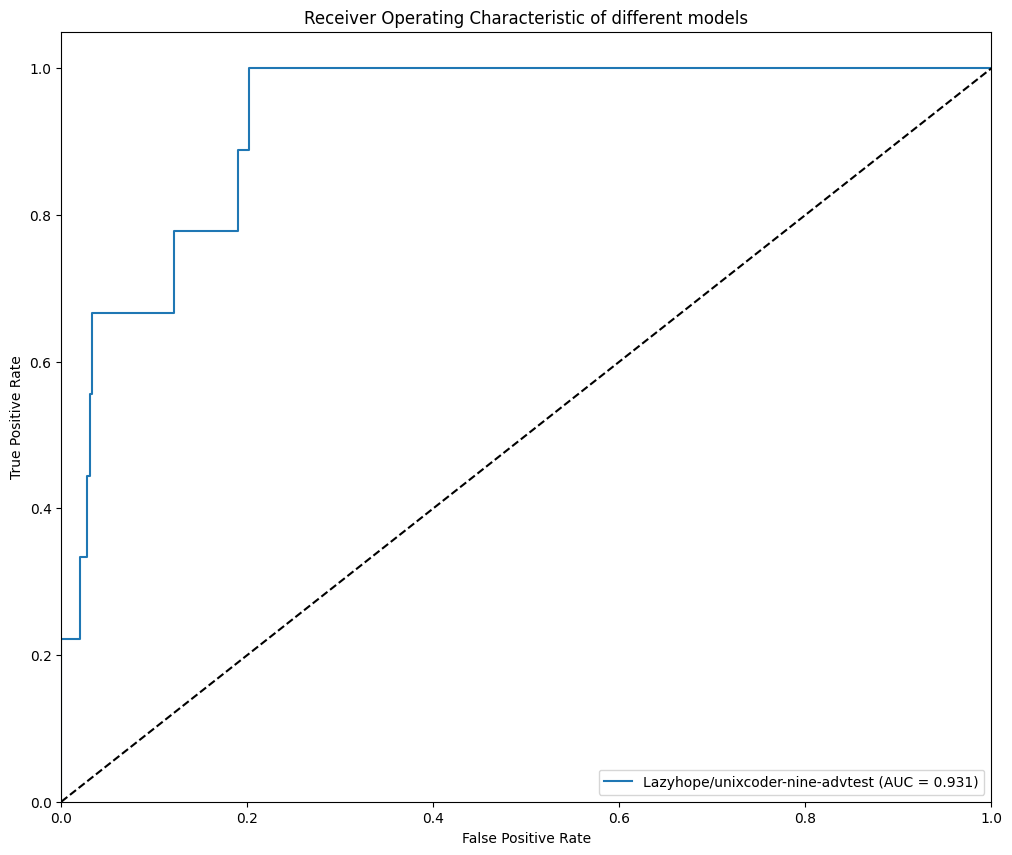

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))

def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)

for model in models:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_doc_evaluation_test_41.png')
plt.show()

In [17]:
model_auc

{'Lazyhope/unixcoder-nine-advtest': 0.8366373501666785}